BANK CUSTOMER CHURN PREDICTION MODEL

OBJECTIVE:
"Develop a machine learning model to predict customer churn accurately, aiming to minimize customer attrition by identifying at-risk customers early. Utilize historical customer data to forecast the likelihood of churn, enabling proactive retention strategies and improving overall customer retention rates."

DATA SOURCE (DATA SET FROM YBI)
[link to dataset](https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [82]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,0.530200,0.70550,0.515100,100090.239881,0.203700,0.638300
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.480517
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,1.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,3.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


In [6]:
#check for duplicate customer ids before making it as index
df.duplicated("CustomerId").sum()
#.sum returns 0 meaning no duplicates

0

In [13]:
df=df.set_index("CustomerId")

In [15]:
#check for the categorical variables
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
#encode the categorical variables using label encoder
from sklearn.preprocessing import LabelEncoder


In [17]:
label_encoder = LabelEncoder()
df["Geography"]=label_encoder.fit_transform(df['Geography'])

In [18]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df["Gender"]=label_encoder.fit_transform(df['Gender'])

In [20]:
df["Num Of Products"]=label_encoder.fit_transform(df['Num Of Products'])

In [22]:
#Check people who have zero bank balance who hae already left the bank by choosing churn column's corresponding values
df.loc[(df["Balance"]==0),"Churn"].value_counts()
#means 500 people who have bank balance 0 left the bank (Churn=1)

Churn
0    3117
1     500
Name: count, dtype: int64

In [23]:

df["Zero Balance"]=np.where(df["Balance"]>0,1,0)

<Axes: >

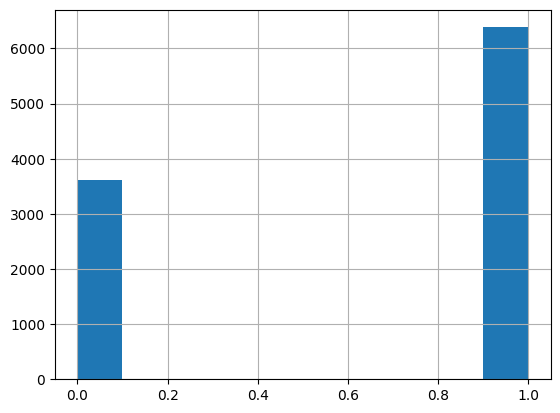

In [25]:
#visualization
df["Zero Balance"].hist()

In [26]:
#based on churn+geography - stats
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

In [27]:
#Defining labels,features,targets
X=df.drop(["Surname","Churn"],axis=1)

In [28]:
Y=df["Churn"]

In [29]:
X.shape,Y.shape

((10000, 11), (10000,))

<Axes: xlabel='Churn', ylabel='count'>

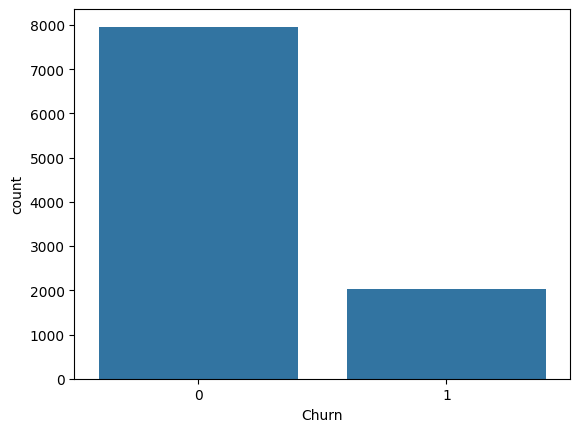

In [30]:
sns.countplot(x="Churn",data=df)

In [31]:
#as there is imbalance , that is only few people are churned.So the mode maybe biased while working with majority class.So we use under sampling
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rus=RandomUnderSampler(random_state=2529)

In [33]:
X_rus,Y_rus=rus.fit_resample(X,Y)

In [34]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [35]:
Y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

In [37]:
#checking over sampling
from imblearn.over_sampling import RandomOverSampler

In [39]:
ros=RandomOverSampler(random_state=2529)

In [40]:
X_ros,Y_ros=ros.fit_resample(X,Y)

In [41]:
Y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

In [42]:
#train test split
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2529)

In [44]:
#undersampling data's split
X_train_rus,X_test_rus,Y_train_rus,Y_test_rus=train_test_split(X_rus,Y_rus,test_size=0.3,random_state=2529)

In [45]:
#over sampling data's split
X_train_ros,X_test_ros,Y_train_ros,Y_test_ros=train_test_split(X_ros,Y_ros,test_size=0.3,random_state=2529)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
#standardize original data
X_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(X_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [49]:
X_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(X_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [50]:
#Standardize rus data
X_train_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(X_train_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [51]:
X_test_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(X_test_rus[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [52]:
#standardizing ros data
X_train_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(X_train_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [53]:
X_test_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(X_test_ros[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

In [54]:
#Using svm
from sklearn.svm import SVC

In [55]:
svc=SVC()

In [56]:
svc.fit(X_train,Y_train)

SVC()

In [57]:
Y_pred=svc.predict(X_test)

In [58]:
#accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
confusion_matrix(Y_test,Y_pred)

array([[2375,   39],
       [ 401,  185]])

In [60]:
print(classification_report(Y_test,Y_pred))
#biased towards non churners as they are more in number

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2414
           1       0.83      0.32      0.46       586

    accuracy                           0.85      3000
   macro avg       0.84      0.65      0.69      3000
weighted avg       0.85      0.85      0.83      3000



In [61]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1,0.1,0.01],
    'kernel': ['rbf'],
    'class_weight':['balanced']
}

In [64]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, Y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [65]:
grid_predictions=grid.predict(X_test)

In [66]:
confusion_matrix(Y_test,grid_predictions)

array([[2121,  293],
       [ 273,  313]])

In [67]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.52      0.53      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



In [68]:
svc_rus=SVC()

In [69]:
svc.fit(X_train_rus,Y_train_rus)

SVC()

In [70]:
Y_pred_rus=svc.predict(X_test_rus)

In [71]:
confusion_matrix(Y_test_rus,Y_pred_rus)

array([[492, 135],
       [180, 416]])

In [72]:
print(classification_report(Y_test_rus,Y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       627
           1       0.75      0.70      0.73       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [73]:
svc_ros=SVC()

In [74]:
svc.fit(X_train_ros,Y_train_ros)

SVC()

In [75]:
Y_pred_ros=svc.predict(X_test_ros)

In [76]:
print(classification_report(Y_test_ros,Y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2379
           1       0.80      0.76      0.78      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [77]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1,0.1,0.01],
    'kernel': ['rbf'],
    'class_weight':['balanced']
}

In [79]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(X_train_ros, Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [80]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [81]:
print(classification_report(Y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2379
           1       0.89      0.98      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778



EXPLANATION:
In the churn prediction modeling process, the Support Vector Classifier (SVC) was employed due to its efficacy in classification tasks, particularly in defining optimal boundaries between different classes. Given the challenge posed by imbalanced data, where instances of churned customers are typically fewer, random over-sampling was implemented. This technique involved artificially increasing the number of minority class instances (churned customers) to achieve a balanced dataset. By doing so, the SVC model had a more representative dataset to learn from, which improved its ability to accurately predict both churn and non-churn instances.

Achieving the highest accuracy through over-sampling highlights the effectiveness of this approach in mitigating class imbalance challenges. Accuracy, as a metric, indicates the proportion of correctly predicted instances relative to all predictions made by the model. However, it's essential to complement accuracy with metrics such as precision, recall, and F1-score to gain deeper insights into the model's performance in identifying churn instances and minimizing false positives.

Hyper parameter turing resulted in a better accuracy.